In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from curvefit.core.model import CurveModel
from curvefit.core.functions import ln_gaussian_cdf

np.random.seed(1234)

In [2]:
df = pd.DataFrame()
df['time'] = np.arange(100)

df['death_rate'] = np.exp(.1 * (df.time - 20)) / (1 + np.exp(.1 * (df.time - 20))) + \
                   np.random.normal(0, 0.1, size=100).cumsum()
df['ln_death_rate'] = np.log(df['death_rate'])

df['group'] = 'all'
df['intercept'] = 1.0

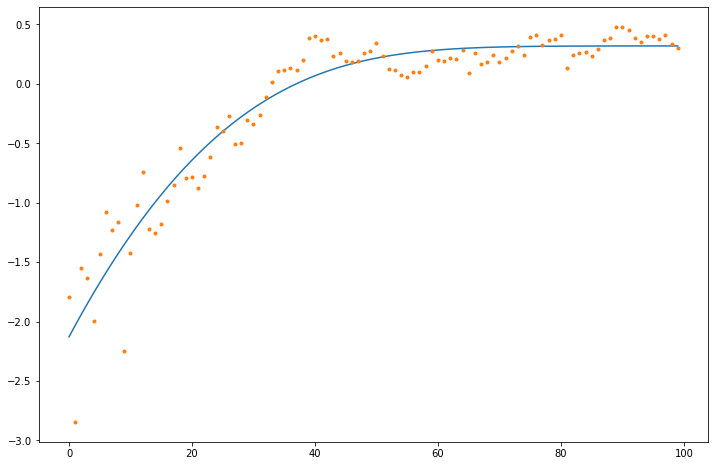

In [4]:
model = CurveModel(
    df=df,
    col_t='time',
    col_obs='ln_death_rate',
    col_group='group',
    col_covs=[['intercept'], ['intercept'], ['intercept']],
    param_names=['alpha', 'beta', 'p'],
    link_fun=[lambda x: x, lambda x: x, lambda x: x],
    var_link_fun=[lambda x: x, lambda x: x, lambda x: x],
    fun=ln_gaussian_cdf
)

model.fit_params(fe_init=[0, 0, 1.],
                 fe_gprior=[[0, np.inf], [0, np.inf], [1., np.inf]])

y_pred = model.predict(
    t=df.time,
    group_name=df.group.unique()
)

plt.figure(figsize=(12, 8))
plt.plot(df.time, y_pred, '-')
plt.plot(df.time, df.ln_death_rate, '.')

In [5]:
df

,time,death_rate,ln_death_rate,group,intercept
0,0,0.166346,-1.793683,all,1.0
1,1,0.058154,-2.844653,all,1.0
2,2,0.213168,-1.545676,all,1.0
3,3,0.194517,-1.637237,all,1.0
4,4,0.135974,-1.995290,all,1.0
...,...,...,...,...,...
95,95,1.490305,0.398981,all,1.0
96,96,1.455881,0.375611,all,1.0
97,97,1.508757,0.411286,all,1.0
98,98,1.401901,0.337829,all,1.0
